# NeuroAutoEncoder - AutoEncoder Example

In [1]:
import EvolutionaryComputation.NeuroEvolution as ne

## Iris Dataset 
Goal is to predict the species given the petal and sepal widths and lengths

In [2]:
from sklearn.datasets import load_boston
from scipy.stats import zscore
import pandas as pd
import numpy as np

In [3]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Preprocessing

In [4]:
# number of observations
n = len(boston.data)

# create indices
ind = np.asarray(range(0, n))
# shuffle
np.random.shuffle(ind)

# percentages
train = 0.6  
val = 0.8 

# train, val, test indices
train_ind = ind[0:int(train*n)]  # train is 60% of data
val_ind = ind[int(train*n):int(val*n)]  # validation is 20% of data
test_ind = ind[int(val*n):n]  # test is 20% of data

In [5]:
x = pd.DataFrame(boston.data, columns = boston.feature_names)
y = np.asarray(boston['target'])

# convert to numpy array
x = np.asarray(x)

# scale between 0 and 1
mx = np.max(x, axis=0)
mn = np.min(x, axis=0)
x = (x-mn)/(mx-mn)

# scale between 0 and 1
mx = np.max(y, axis=0)
mn = np.min(y, axis=0)
y = (y-mn)/(mx-mn)

In [6]:
x[0:5]

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, 0.00000000e+00,
        3.14814815e-01, 5.77505269e-01, 6.41606591e-01, 2.69203139e-01,
        0.00000000e+00, 2.08015267e-01, 2.87234043e-01, 1.00000000e+00,
        8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, 0.00000000e+00,
        1.72839506e-01, 5.47997701e-01, 7.82698249e-01, 3.48961980e-01,
        4.34782609e-02, 1.04961832e-01, 5.53191489e-01, 1.00000000e+00,
        2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, 0.00000000e+00,
        1.72839506e-01, 6.94385898e-01, 5.99382080e-01, 3.48961980e-01,
        4.34782609e-02, 1.04961832e-01, 5.53191489e-01, 9.89737254e-01,
        6.34657837e-02],
       [2.92795719e-04, 0.00000000e+00, 6.30498534e-02, 0.00000000e+00,
        1.50205761e-01, 6.58555279e-01, 4.41812564e-01, 4.48544590e-01,
        8.69565217e-02, 6.67938931e-02, 6.48936170e-01, 9.94276060e-01,
        3.33885210e-02],
       [7.05070075e-04, 0.00000000e+

In [7]:
y[0:5]

array([0.42222222, 0.36888889, 0.66      , 0.63111111, 0.69333333])

# Testing Models
Because the `greedy` algorithm creates $8$ offspring per set of parents, a total of $O(8*n*m)$ models are created, where *n* refers to the generation size and *m* refers to the number of generations. On the other hand, `self-adaptive` algorithm only creates $4$ offspring per set of parents. Lastly, the `generic` algorithm creates $4$ offspring per set of parents. In order to accurately compare the algorithms for the given dataset, all models will have the same population size of $25$, and activation function, $relu$; but, their maximum number of generations will diff such that only $40000$ models are created. 
- `greedy`: max_epoch=200
- `generic`: max_epoch=400
- `self-adaptive`: max_epoch=400

In [57]:
layer_nodes = [9, 7, 5, 3, 5, 7, 9]  # three hidden layers, 50 nodes each
num_input = x.shape[1]  # number of variables
population_size = 25

## Greedy Algorithm

In [58]:
model1 = ne.NeuroAutoEncoder(layer_nodes=layer_nodes, num_input=num_input,
                         population_size=population_size, activation_function='relu')

In [59]:
model1.evolve(max_epoch=100, batch_size=50, train_data=[x[train_ind], x[train_ind]], val_data=[x[val_ind], x[val_ind]],
             early_stopping=True, verbose=True, 
             warm_start=False, algorithm='greedy', patience=20)

Number of Trainable Parameters Per Network: 506
Epoch 1/100
 Batch 7/7   Results for Batch: Best Loss: 0.0807185 Mean Loss: 0.0990601 Val Loss: 0.0933955
Epoch 2/100
 Batch 7/7   Results for Batch: Best Loss: 0.0659964 Mean Loss: 0.0737976 Val Loss: 0.0657209
Epoch 3/100
 Batch 7/7   Results for Batch: Best Loss: 0.0650884 Mean Loss: 0.0657838 Val Loss: 0.0603868
Epoch 4/100
 Batch 7/7   Results for Batch: Best Loss: 0.0645743 Mean Loss: 0.0651699 Val Loss: 0.0596997
Epoch 5/100
 Batch 7/7   Results for Batch: Best Loss: 0.0637483 Mean Loss: 0.0638123 Val Loss: 0.0593512
Epoch 6/100
 Batch 7/7   Results for Batch: Best Loss: 0.0635102 Mean Loss: 0.0635524 Val Loss: 0.0593791
Epoch 7/100
 Batch 7/7   Results for Batch: Best Loss: 0.0634748 Mean Loss: 0.063491 Val Loss: 0.05933688
Epoch 8/100
 Batch 7/7   Results for Batch: Best Loss: 0.0635331 Mean Loss: 0.0638012 Val Loss: 0.0588569
Epoch 9/100
 Batch 7/7   Results for Batch: Best Loss: 0.0621157 Mean Loss: 0.0623599 Val Loss: 0.058652

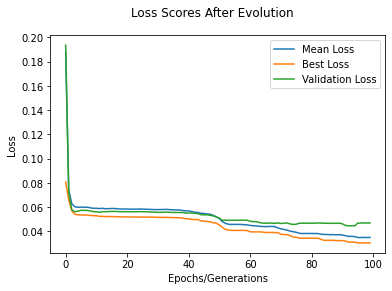

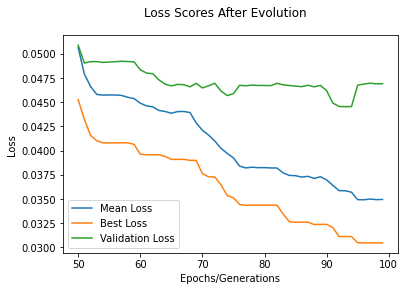

In [61]:
model1.plot()
model1.plot(starting_gen=50)

# Generic Algorithm

In [65]:
model2 = ne.NeuroAutoEncoder(layer_nodes=layer_nodes, num_input=num_input,
                         population_size=population_size, activation_function='relu')

In [66]:
model2.evolve(max_epoch=200, batch_size=50, train_data=[x[train_ind], x[train_ind]], val_data=[x[val_ind], x[val_ind]],
             early_stopping=True, verbose=True, 
             warm_start=False, algorithm='generic', patience=40)

Number of Trainable Parameters Per Network: 506
Epoch 1/200
 Batch 7/7   Results for Batch: Best Loss: 0.1550128 Mean Loss: 0.1751792 Val Loss: 0.1722156
Epoch 2/200
 Batch 7/7   Results for Batch: Best Loss: 0.1161189 Mean Loss: 0.1206219 Val Loss: 0.1132188
Epoch 3/200
 Batch 7/7   Results for Batch: Best Loss: 0.1040363 Mean Loss: 0.1068271 Val Loss: 0.0997636
Epoch 4/200
 Batch 7/7   Results for Batch: Best Loss: 0.0899844 Mean Loss: 0.0937284 Val Loss: 0.0882066
Epoch 5/200
 Batch 7/7   Results for Batch: Best Loss: 0.0776565 Mean Loss: 0.0814956 Val Loss: 0.0768369
Epoch 6/200
 Batch 7/7   Results for Batch: Best Loss: 0.0688849 Mean Loss: 0.071364 Val Loss: 0.06653615
Epoch 7/200
 Batch 7/7   Results for Batch: Best Loss: 0.0628538 Mean Loss: 0.0649203 Val Loss: 0.0613182
Epoch 8/200
 Batch 7/7   Results for Batch: Best Loss: 0.0623626 Mean Loss: 0.063133 Val Loss: 0.06009194
Epoch 9/200
 Batch 7/7   Results for Batch: Best Loss: 0.0619729 Mean Loss: 0.0625128 Val Loss: 0.059633

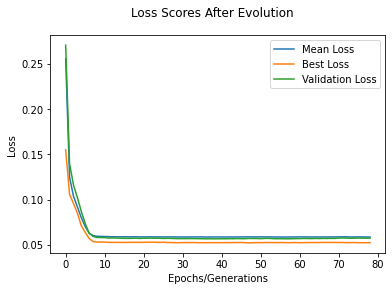

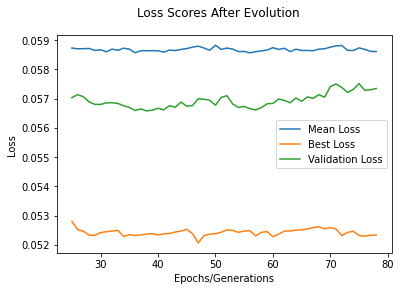

In [67]:
model2.plot()
model2.plot(starting_gen=25)

# Self-Adaptive Algorithm

In [68]:
model3 = ne.NeuroAutoEncoder(layer_nodes=layer_nodes, num_input=num_input,
                         population_size=population_size, activation_function='relu')

In [69]:
model3.evolve(max_epoch=200, batch_size=50, train_data=[x[train_ind], x[train_ind]], val_data=[x[val_ind], x[val_ind]],
             early_stopping=True, verbose=True, 
             warm_start=False, algorithm='self-adaptive', patience=40)

Number of Trainable Parameters Per Network: 506
Epoch 1/200
 Batch 7/7   Results for Batch: Best Loss: 0.167956 Mean Loss: 0.1720821 Val Loss: 0.16486526
Epoch 2/200
 Batch 7/7   Results for Batch: Best Loss: 0.1471716 Mean Loss: 0.1521302 Val Loss: 0.1421504
Epoch 3/200
 Batch 7/7   Results for Batch: Best Loss: 0.1401492 Mean Loss: 0.1447938 Val Loss: 0.1311695
Epoch 4/200
 Batch 7/7   Results for Batch: Best Loss: 0.1330836 Mean Loss: 0.1363883 Val Loss: 0.1243212
Epoch 5/200
 Batch 7/7   Results for Batch: Best Loss: 0.1259575 Mean Loss: 0.1298302 Val Loss: 0.1172438
Epoch 6/200
 Batch 7/7   Results for Batch: Best Loss: 0.120267 Mean Loss: 0.1258056 Val Loss: 0.11294449
Epoch 7/200
 Batch 7/7   Results for Batch: Best Loss: 0.1156519 Mean Loss: 0.1211564 Val Loss: 0.1075395
Epoch 8/200
 Batch 7/7   Results for Batch: Best Loss: 0.1104499 Mean Loss: 0.1145965 Val Loss: 0.1010822
Epoch 9/200
 Batch 7/7   Results for Batch: Best Loss: 0.1029941 Mean Loss: 0.1062388 Val Loss: 0.094242

 Batch 7/7   Results for Batch: Best Loss: 0.025803 Mean Loss: 0.0270398 Val Loss: 0.02804131
Epoch 154/200
 Batch 7/7   Results for Batch: Best Loss: 0.025803 Mean Loss: 0.0270235 Val Loss: 0.02793644
Epoch 155/200
 Batch 7/7   Results for Batch: Best Loss: 0.025803 Mean Loss: 0.0270297 Val Loss: 0.02805844
Epoch 156/200
 Batch 7/7   Results for Batch: Best Loss: 0.025803 Mean Loss: 0.0270172 Val Loss: 0.02802688
Epoch 157/200
 Batch 7/7   Results for Batch: Best Loss: 0.025803 Mean Loss: 0.027209 Val Loss: 0.028114863
Epoch 158/200
 Batch 7/7   Results for Batch: Best Loss: 0.025803 Mean Loss: 0.0272178 Val Loss: 0.02821188
Epoch 159/200
 Batch 7/7   Results for Batch: Best Loss: 0.025803 Mean Loss: 0.0270542 Val Loss: 0.02807057
Epoch 160/200
 Batch 7/7   Results for Batch: Best Loss: 0.025803 Mean Loss: 0.0269192 Val Loss: 0.02799311
Epoch 161/200
 Batch 7/7   Results for Batch: Best Loss: 0.025803 Mean Loss: 0.0270842 Val Loss: 0.02805857
Epoch 162/200
 Batch 7/7   Results for Bat

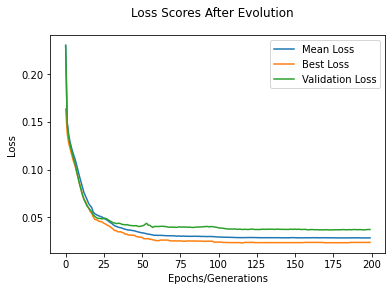

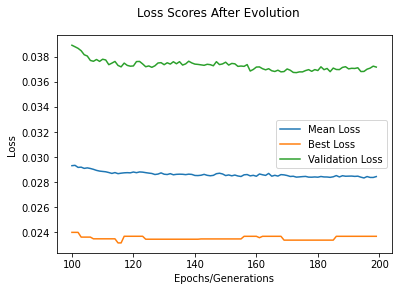

In [70]:
model3.plot()
model3.plot(starting_gen=100)

# Comparing Models
We will compare by use of accuracy score through the validation data

In [71]:
from sklearn.metrics import r2_score

In [72]:
r1 = r2_score(x[val_ind], model1.predict(x[val_ind]))
r2 = r2_score(x[val_ind], model2.predict(x[val_ind]))
r3 = r2_score(x[val_ind], model3.predict(x[val_ind]))
print("Greedy: {}, Generic: {}, Self-Adaptive: {}".format(r1, r2, r3))

Greedy: 0.2122883806215234, Generic: -0.02358196687914788, Self-Adaptive: 0.40143130280049594


As we can see, only one model performed acceptable, `self-adaptive`, achieving an $R^2$ value of 0.4104; meaning that the model explains approximately $40$% of the variability of the data. 

# Testing Final Model

In [99]:
r2_score(x[test_ind], model3.predict(x[test_ind]))

0.4380482088157349

As we can see, from the test data, our final model performs a little bit better than the validation score, obtaining an $R^2$ value of 0.43

# Predicted Values in Original Form

In [101]:
# convert back into original form
(model3.predict(x[test_ind])*(mx-mn)+mn)[0:5]

array([[ 5.14179664, 16.23483935, 15.26373679, 10.33593105, 13.04701696,
        28.65557025, 25.76458502, 22.80592032,  7.23165991, 12.69441817,
        26.59773358, 49.27301532, 13.72520737],
       [ 6.81081108, 18.9569395 , 18.90485945, 11.50525699, 12.00142039,
        27.30772798, 24.62390011, 25.84239111,  7.83338649, 11.84614386,
        24.99821731, 46.82660158, 12.98516373],
       [12.01074474, -0.67399573, 34.85705551,  3.87453503, 39.72033748,
        26.73256595, 50.1206611 , 12.00654938, 50.41537273, 38.73362742,
        42.98824203, 34.11797949, 20.82280976],
       [11.81376153, -0.29107992, 36.53245158,  4.0479955 , 39.59650944,
        26.59172388, 50.74138656, 10.68307282, 51.33804452, 40.54032271,
        43.43869246, 35.29846993, 20.78664326],
       [ 4.6311441 , 15.40301089, 14.15755963,  9.97740947, 13.37242745,
        29.05694947, 26.11426574, 21.8792147 ,  7.06734999, 12.95307278,
        27.08910918, 50.00484993, 13.94944697]])

# Actual Values in Original Form

In [102]:
(x[test_ind]*(mx-mn)+mn)[0:5]

array([[ 5.0106064 ,  5.        , 15.90359238,  5.        , 12.77777778,
        36.2473654 , 31.97219361, 20.70328911,  6.95652174,  9.72328244,
        29.89361702, 49.53817641,  7.85596026],
       [ 5.0155429 , 14.        ,  9.73423754,  5.        , 10.36111111,
        34.3763173 , 20.89598352, 21.83924561, 12.82608696,  7.49045802,
        16.0106383 , 49.47009431,  8.5513245 ],
       [18.11727744,  5.        , 34.09824047,  5.        , 32.22222222,
        20.02874114, 44.94850669,  7.11927907, 50.        , 46.13549618,
        41.38297872, 19.41525039, 35.93129139],
       [19.49059614,  5.        , 34.09824047,  5.        , 24.62962963,
        18.74401226, 50.        ,  6.88153025, 50.        , 46.13549618,
        41.38297872, 28.9024913 , 27.78559603],
       [ 5.03172815,  5.        ,  7.8372434 ,  5.        , 11.75925926,
        35.91971642, 28.77445932, 25.18450654,  8.91304348,  8.00572519,
        34.20212766, 50.        ,  9.47019868]])

# Compare Against Same Model Trained Through Numerical Methods

In [93]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [94]:
inputs = tf.keras.Input(shape=(num_input,))
encoding = layers.Dense(9, activation='relu')(inputs)
encoding = layers.Dense(7, activation='relu')(encoding)
encoding = layers.Dense(5, activation='relu')(encoding)
latent = layers.Dense(3, activation='relu')(encoding)
decoding = layers.Dense(5, activation='relu')(latent)
decoding = layers.Dense(7, activation='relu')(decoding)
decoding = layers.Dense(9, activation='relu')(decoding)
outputs = layers.Dense(num_input, activation='relu')(decoding)
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mean_squared_error')

In [95]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_8 (Dense)              (None, 9)                 126       
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 70        
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 18        
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 20        
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 42  

In [96]:
callback = [EarlyStopping(monitor='loss', patience=10), EarlyStopping(monitor='val_loss', patience=10)]
history = model.fit(x[train_ind], x[train_ind], epochs=500, validation_data=(x[val_ind], x[val_ind]), 
          callbacks=callback)

Epoch 1/500
10/10 [==============================] - 1s 20ms/step - loss: 0.2241 - val_loss: 0.2092
Epoch 2/500
10/10 [==============================] - 0s 10ms/step - loss: 0.1930 - val_loss: 0.1800
Epoch 3/500
10/10 [==============================] - 0s 9ms/step - loss: 0.1680 - val_loss: 0.1595
Epoch 4/500
10/10 [==============================] - 0s 9ms/step - loss: 0.1502 - val_loss: 0.1437
Epoch 5/500
10/10 [==============================] - 0s 10ms/step - loss: 0.1353 - val_loss: 0.1301
Epoch 6/500
10/10 [==============================] - 0s 10ms/step - loss: 0.1234 - val_loss: 0.1198
Epoch 7/500
10/10 [==============================] - 0s 10ms/step - loss: 0.1146 - val_loss: 0.1129
Epoch 8/500
10/10 [==============================] - 0s 10ms/step - loss: 0.1086 - val_loss: 0.1088
Epoch 9/500
10/10 [==============================] - 0s 10ms/step - loss: 0.1051 - val_loss: 0.1067
Epoch 10/500
10/10 [==============================] - 0s 10ms/step - loss: 0.1034 - val_loss: 0.1059
E

Epoch 83/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0346 - val_loss: 0.0323
Epoch 84/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0344 - val_loss: 0.0321
Epoch 85/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0342 - val_loss: 0.0318
Epoch 86/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0340 - val_loss: 0.0316
Epoch 87/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0338 - val_loss: 0.0315
Epoch 88/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0336 - val_loss: 0.0314
Epoch 89/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0335 - val_loss: 0.0312
Epoch 90/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0333 - val_loss: 0.0310
Epoch 91/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0331 - val_loss: 0.0309
Epoch 92/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0330 - val_loss: 0.0308

10/10 [==============================] - 0s 9ms/step - loss: 0.0266 - val_loss: 0.0256
Epoch 245/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0266 - val_loss: 0.0256
Epoch 246/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0266 - val_loss: 0.0255
Epoch 247/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0265 - val_loss: 0.0255
Epoch 248/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0265 - val_loss: 0.0255
Epoch 249/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0264 - val_loss: 0.0254
Epoch 250/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0264 - val_loss: 0.0255
Epoch 251/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0264 - val_loss: 0.0254
Epoch 252/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0263 - val_loss: 0.0254
Epoch 253/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0263 - val_loss: 0.0254
Ep

10/10 [==============================] - 0s 9ms/step - loss: 0.0249 - val_loss: 0.0246
Epoch 326/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0248 - val_loss: 0.0245
Epoch 327/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0248 - val_loss: 0.0244
Epoch 328/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0248 - val_loss: 0.0244
Epoch 329/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0247 - val_loss: 0.0244
Epoch 330/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0247 - val_loss: 0.0244
Epoch 331/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0247 - val_loss: 0.0243
Epoch 332/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0247 - val_loss: 0.0244
Epoch 333/500
10/10 [==============================] - 0s 8ms/step - loss: 0.0247 - val_loss: 0.0244
Epoch 334/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0247 - val_loss: 0.0243
Epo

10/10 [==============================] - 0s 9ms/step - loss: 0.0234 - val_loss: 0.0232
Epoch 407/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0234 - val_loss: 0.0231
Epoch 408/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0234 - val_loss: 0.0232
Epoch 409/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0234 - val_loss: 0.0232
Epoch 410/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0233 - val_loss: 0.0231
Epoch 411/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0233 - val_loss: 0.0232
Epoch 412/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0234 - val_loss: 0.0231
Epoch 413/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0233 - val_loss: 0.0231
Epoch 414/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0232 - val_loss: 0.0230
Epoch 415/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0232 - val_loss: 0.0230
Epo

Epoch 487/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0213 - val_loss: 0.0211
Epoch 488/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0212 - val_loss: 0.0210
Epoch 489/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0212 - val_loss: 0.0210
Epoch 490/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0211 - val_loss: 0.0210
Epoch 491/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0212 - val_loss: 0.0210
Epoch 492/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0211 - val_loss: 0.0210
Epoch 493/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0211 - val_loss: 0.0209
Epoch 494/500
10/10 [==============================] - 0s 10ms/step - loss: 0.0211 - val_loss: 0.0209
Epoch 495/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0210 - val_loss: 0.0208
Epoch 496/500
10/10 [==============================] - 0s 9ms/step - loss: 0.0210 - val_l

In [97]:
r2_score(x[val_ind], model.predict(x[val_ind]))

0.35932673556303435

As we can see, the Keras model with the same architecture achieved a lower $R^2$ value for the validation set, revealing that the genetic algorithm achieved a much better model for this auto-encoder.